# rf-cv 데모
* cross-validation 검증 방법: hold out validation, n-fold cv, stratified n-fold cv, leave one out  

## 라이브러리 import 및 설정

In [44]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing


rcParams['figure.figsize'] = (16, 8)       #그림 사이즈 지정
plt.style.use('fivethirtyeight')           #그림 기본 스타일
pd.set_option('max_columns', 100)          #칼럼 100개 허용
pd.set_option("display.precision", 4)      #소수점 4자리허용
warnings.simplefilter('ignore')            #경고분 무시

## 학습데이터 로드

In [45]:
feature_file = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\feature.csv'
sample_file  = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\sample_submission.csv'
tst_file     = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\testset.csv'
trn_file     = 'C:\\Users\\USER\\Desktop\\Dataset\\DataInput\\trainset.csv'
df= pd.read_csv(feature_file,index_col=0)
print(df.shape)
df.head()                                       #(4280, 32)

(6113, 32)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,188,128,95,114,143,108,88,103,113,85,88,113,87,88,103,87,84,99,104,82,96,100,78,70,79,84,66,70,75,76,63,HI
1,174,112,88,104,119,92,74,79,88,74,67,90,68,71,73,68,71,77,90,67,71,82,65,70,75,89,73,67,71,89,73,PH
2,175,138,106,105,135,109,75,95,113,96,74,112,96,70,87,100,66,83,117,67,88,110,98,67,88,119,98,75,91,110,94,GR
3,176,111,80,106,131,96,76,99,104,85,75,89,75,79,91,75,84,103,109,82,91,96,78,78,91,96,78,82,104,112,85,PH
4,182,144,111,100,151,119,67,106,114,90,76,115,94,68,106,91,68,102,115,71,95,108,88,71,103,113,92,68,107,118,92,EL


In [46]:
y = df.iloc[:,31].values[:4280]                  #학습_종속 4820개
df.drop(df.columns[[31]], axis=1, inplace=True)  #독립을 위한 종속 제거
trn = df.iloc[:4280].values                      #학습데이터_독립 4280개
tst = df.iloc[4280:].values                      #시험데이터_독립 1883개
print(y.shape, trn.shape, tst.shape)             #(4280,) (4280, 31) (1833, 31)

(4280,) (4280, 31) (1833, 31)


In [47]:
seed=150
kfold=10

## Stratified K-Fold Cross Validation
*Stratified N-Fold CV: N-Fold CV에서 각각의 폴드에서 종속변수의 분포가 동일하도록 폴드를 나누는 방식.
현재 사용하는 데이터처럼 분류학습에서 종속변수의 범주의 분포가 균일하지 않을 때 사용된다.

In [48]:
cv = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=seed)

### [범주형 > 수치형 변환_종속변수]

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

label_str=y
label_int=le.fit_transform(label_str).astype('int')
#target=le.inverse_transform(label_int)
#target
y
label_int

array([3, 5, 2, ..., 1, 5, 1])

## Random Forest 모델 학습 

In [50]:
p_val = np.zeros((trn.shape[0], 6))
p_tst = np.zeros((tst.shape[0], 6))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = RandomForestClassifier(n_estimators=500,
                                 bootstrap=False,
                                 max_features='auto',
                                 max_samples=1,
                                 #n_estimators = 1000, 
                                 #max_depth = 30,
                                 #min_samples_leaf = 4,
                                 #min_samples_split = 8,
                                 random_state=seed,
                                 n_jobs=-1)
    
    clf.fit(trn[i_trn], label_int[i_trn])
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / kfold

training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4
training model for CV #5
training model for CV #6
training model for CV #7
training model for CV #8
training model for CV #9
training model for CV #10


** ( 범주값 출력: clf.pedict(), 확률값출력: clf.predict_proba() ) **

In [51]:
print(f'{accuracy_score(label_int, np.argmax(p_val, axis=1)) * 100:.4f}%')
#hw7-rf 91.3785 3000만 90.9112 3500 depth50 90.7477 hw8rf-cv 91.3785 cv10>91729 15번은 의미X

91.7523%


## Simple way Cross Validation

In [30]:
scores = cross_val_score(clf, trn,y, cv=10) # model, train, target, cross validation
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()*100))

#cross-val-score 
#[0.87616822 0.89369159 0.875      0.88317757 0.89369159]
#cross-val-score.mean 
#88.435 ne 100  minchild 10  maxsamples 5

cross-val-score 
[0.9088785  0.93691589 0.92523364 0.9182243  0.89719626 0.9088785
 0.90186916 0.9228972  0.93691589 0.89252336]
cross-val-score.mean 
91.495


#### [stacking 사용을 위해 p_val,p_tst 저장]

In [52]:
val_dir = Path('C:\\Users\\USER\\Desktop\\Dataset\\val')
tst_dir = Path('C:\\Users\\USER\\Desktop\\Dataset\\tst')
name = 'rfcvFeature'
model_name = f'{name}'
p_val_file = val_dir / f'{name}.val.csv'
p_tst_file = tst_dir / f'{name}.tst.csv'

In [53]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=', ')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=', ')

## 피처 중요도 시각화

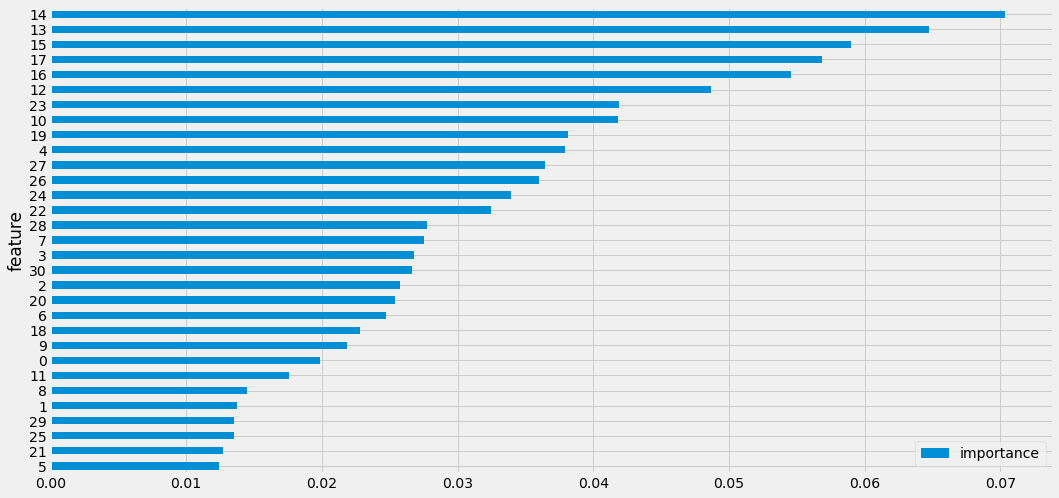

In [39]:
imp = pd.DataFrame({'feature': df.columns[:31], 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

### [수치형 > 범주형 변환_종속변수]

In [54]:
pt=np.zeros(shape=(1833,))
pt = pt.astype(np.int64)
for x in range(0,1833):
    pt[x] = np.argmax(p_tst[x,:])
target=le.inverse_transform(pt)
target

array(['HI', 'EL', 'HI', ..., 'PH', 'PH', 'CO'], dtype=object)

## 제출 파일 생성

In [55]:
#sub = pd.read_csv(sample_file)
#sub['class']
sub = pd.read_csv(sample_file)
sub['class'] = target
sub.to_csv('C:\\Users\\USER\\Desktop\\Dataset\\sub\\rfcv-sub.csv',index=False,header=False)